<a href="https://colab.research.google.com/github/Guillermina86/Procesamiento-digital-de-imagenes/blob/main/TP3_PDI_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### La actividad propuesta debe permitir seleccionar dos imágenes y con estas poder acceder a un menú que permita realizar las siguientes operaciones entre estas:
En espacio RGB:
Sumas y restas: clampeada y promediada

En espacio YIQ:
Sumas y Restas: clampeada, promediada, if-ligther, if-darker

# Librerías y funciones a utilizar

In [21]:
# Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
import imageio as io

In [22]:
# Suma
def suma (imagen1, imagen2):
   imagen_suma = imagen1 + imagen2
   return imagen_suma

In [23]:
# Resta
def resta (imagen1, imagen2):
    imagen_resta = imagen1 - imagen2
    return imagen_resta

In [24]:
# Promedio
def promedio (imagen):
    imagen_prom = imagen / 2
    return imagen_prom

In [25]:
# clampeada
def clamp (imagen):
  return np.clip(imagen, 0, 1)

In [26]:
# Función para ver una imagen
def get_image(rute):
  imagen = io.imread(rute)
  imagen = imagen.astype(np.int)
  return imagen

# Plotear Imagen
def plot_image(im, title, cmap=None):
  fig, ax = plt.subplots(dpi=100)
  ax.imshow(im, cmap=cmap)
  ax.set_title(title)
  plt.axis('off')
  plt.show()

In [27]:
# Obtener caracteristicas de la imagen
def info_image(im):
  print('Dimensiones y número de canales de la imagen:', im.shape)
  print('Tipo de archivo:', im.dtype)

In [55]:
# Descomponer la imagen en sus compomentes RGB
def imagen2rgb(imagen):
  r = imagen[:,:,0]
  g = imagen[:,:,1]
  b = imagen[:,:,2]
  return r, g, b

# Construir Imagen a partir de sus componentes RGB
def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = r
  im_out[:,:,1] = g
  im_out[:,:,2] = b
  return im_out.astype(np.uint8)

# Función para pasar del espacio de color RGB a YIQ
def rgb2yiq(imagen):
    yiq = np.zeros(imagen.shape)  # creo una matriz con 0 del tamaño de la imagen de entrada
    yiq[:,:,0] = imagen[:,:,0] * 0.299 + imagen[:,:,1] * 0.587 + imagen[:,:,2] * 0.114
    yiq[:,:,1] = imagen[:,:,0] * 0.595716 + imagen[:,:,1] * -0.274453 + imagen[:,:,2] * -0.321263
    yiq[:,:,2] = imagen[:,:,0] * 0.211456 + imagen[:,:,1] * -0.522591 + imagen[:,:,2] * 0.311135
    return yiq

# Descomponer la imagen en sus compomentes YIQ
def imagen2yiq(yiq):
    y = yiq[:,:,0]
    i = yiq[:,:,1]
    q = yiq[:,:,2]
    return y, i, q

# Construir Imagen a partir de sus componentes YIQ
def yiq_to_image(y,i,q):
    Shape = y.shape
    im_out2 = np.zeros((Shape[0], Shape[1], 3))
    im_out2[:,:,0] = y
    im_out2[:,:,1] = i
    im_out2[:,:,2] = q
    return im_out2

# Función para pasar del espacio de color YIQ a RGB
def yiq2rgb(yiq):
    rgb = np.zeros(yiq.shape)
    rgb[:,:,0] = yiq[:,:,0] * 1 + yiq[:,:,1] * 0.9663 + yiq[:,:,2] * 0.6210
    rgb[:,:,1] = yiq[:,:,0] * 1 + yiq[:,:,1] * -0.2721 + yiq[:,:,2] * -0.6474
    rgb[:,:,2] = yiq[:,:,0] * 1 + yiq[:,:,1] * -1.1070 + yiq[:,:,2] * 1.7046

    rgb = np.clip(rgb, 0, 1)      # Matriz que contiene elementos para recortar, valor mínimo y máximo.
    return rgb

## Imagen de una casa

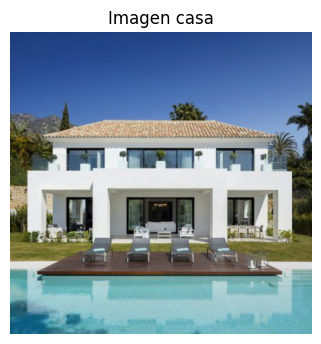

In [29]:
casa = 'https://i.pinimg.com/564x/d6/c7/33/d6c73301429d80e3970dc89665848582.jpg'
imagen = get_image(casa)
plot_image(imagen, 'Imagen casa')

## Imagen de un arbol

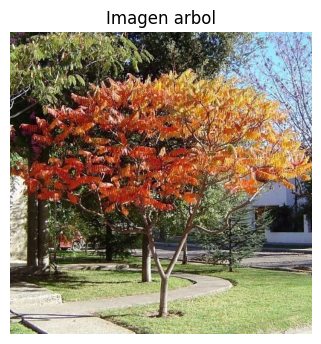

In [30]:
arbol ='https://http2.mlstatic.com/D_NQ_NP_801020-MLA40507996341_012020-O.jpg'
imagen_2 = get_image(arbol)
plot_image(imagen_2, 'Imagen arbol')

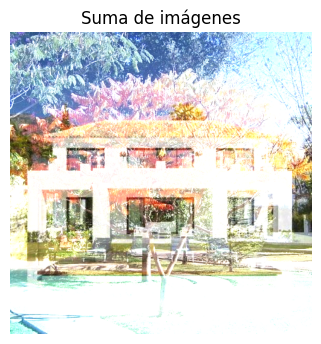

In [31]:
# Suma

yiq1 = rgb2yiq(imagen/255)
yiq2 = rgb2yiq(imagen_2/255)
yiq_suma = suma(yiq1, yiq2)
suma_yiq = yiq2rgb(yiq_suma)
plot_image(suma_yiq, 'Suma de imágenes')

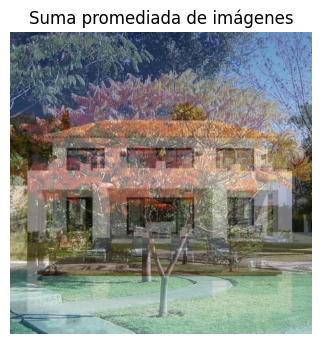

In [32]:
# Suma promediada

yiq1 = rgb2yiq(imagen/255)
yiq2 = rgb2yiq(imagen_2/255)
yiq_suma_prom = promedio(suma(yiq1, yiq2))
suma_yiq = yiq2rgb(yiq_suma_prom)
plot_image(suma_yiq, 'Suma promediada de imágenes')

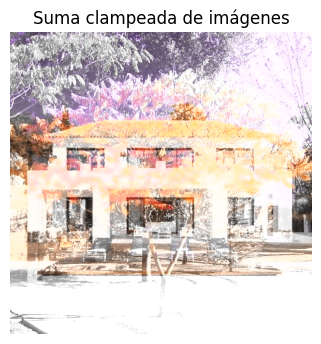

In [33]:
# Suma clampeada

yiq1 = rgb2yiq(imagen/255)
yiq2 = rgb2yiq(imagen_2/255)
yiq_suma_clamp = clamp(suma(yiq1, yiq2))
suma_yiq = yiq2rgb(yiq_suma_clamp)
plot_image(suma_yiq, 'Suma clampeada de imágenes')

## Interpolación

In [48]:
yiq1 = rgb2yiq(imagen/255)
y, i, q = imagen2yiq(yiq1)
yA = y
iA = i
qA = q

In [49]:
yiq2 = rgb2yiq(imagen_2/255)
y, i, q = imagen2yiq(yiq2)
yB = y
iB = i
qB = q

In [50]:
IC = (yA * iA + yB * iB)/(yA + yB)
QC = (yA * qA + yB * qB)/(yA + qB)

In [47]:
YC = clamp(suma(yA, yB))

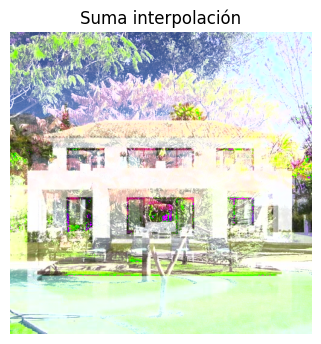

In [57]:
imagen_final = yiq_to_image(YC, IC, QC)
imagen_final_2 = yiq2rgb(imagen_final)
plot_image(imagen_final_2, 'Suma interpolación')

## Iflighter - Ifdarker

In [40]:
def iflighter (imagen1, imagen2):
  v,w,u = imagen1.shape
  imagen3 = np.zeros(imagen1.shape)
  for x in range (v):
    for y in range (w):
        valor1 = imagen1[x,y,0]
        valor2 = imagen2[x,y,0]
        if valor1 > valor2:
            imagen3[x,y,0:3]=imagen1[x,y,0:3]
        else:
            imagen3[x,y,0:3]=imagen2[x,y,0:3]
  return imagen3


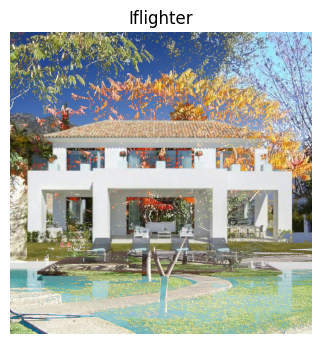

In [41]:
yiq_if_lighter = iflighter(yiq1, yiq2)
yiq_if_lighter_2 = yiq2rgb(yiq_if_lighter)
plot_image(yiq_if_lighter_2, 'Iflighter')

In [42]:
def ifdarker (imagen1, imagen2):
  v,w,u = imagen1.shape
  imagen3 = np.zeros(imagen1.shape)
  for x in range (v):
    for y in range (w):
        valor1 = imagen1[x,y,0]
        valor2 = imagen2[x,y,0]
        if valor1 > valor2:
            imagen3[x,y,0:3]=imagen2[x,y,0:3]
        else:
            imagen3[x,y,0:3]=imagen1[x,y,0:3]
  return imagen3

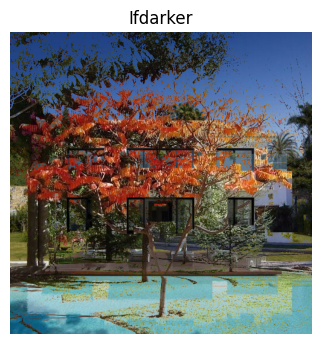

In [43]:
yiq_if_darker = ifdarker(yiq1, yiq2)
yiq_if_darker_2 = yiq2rgb(yiq_if_darker)
plot_image(yiq_if_darker_2, 'Ifdarker')